In [25]:
#Import essential libraries
import matplotlib.pyplot as plt
import numpy as np
import typy
import pandas as pd
%matplotlib inline
from tqdm import tqdm

In [ ]:
print(3)

In [26]:
#Paralel computing 
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()-2

In [27]:
#Data folder
work_dir = "/work/bansil/s.sevim/0_NbSe2_Work/0.00565"
outfolder="results_test"

In [28]:
#Define data size
nk = 256*256
nq = 2001
q_path = np.arange(nq)
nph = 9

In [29]:
#Fermi energy and convergance parameter
ef = 1.126000
delta=0.0000001

In [30]:
#Initialize data array
ph = np.zeros(shape=(nph,nq))
g_abs = np.zeros(shape=(nph,nq,nk))
g_re = np.zeros(shape=(nph,nq,nk))
g_im = np.zeros(shape=(nph,nq,nk))
e_k = np.zeros(shape=(nq,nk))
e_kq = np.zeros(shape=(nq,nk))

In [ ]:
#Load data as pandas object
%time
ph_df = pd.DataFrame()
g_abs_df = pd.DataFrame()
g_re_df = pd.DataFrame()
g_im_df = pd.DataFrame()
e_k_df = pd.DataFrame()
e_kq_df = pd.DataFrame()
for i in tqdm(range(nph)):
    ph_df[i]    = pd.read_csv(f"{work_dir}/{outfolder}/omega/omega_{i+1}.dat", delimiter=' ',header=None)
    g_abs_df[i] = pd.read_csv(f"{work_dir}/{outfolder}/gkk_abs/gkk_{i+1}.dat", delimiter=' ',header=None)
    g_re_df[i]  = pd.read_csv(f"{work_dir}/{outfolder}/gkk_re/gkk_{i+1}.dat", delimiter=' ',header=None)
    g_im_df[i]  = pd.read_csv(f"{work_dir}/{outfolder}/gkk_im/gkk_{i+1}.dat", delimiter=' ',header=None)
e_k_df  = pd.read_csv(f"{work_dir}/{outfolder}/enk/enk_{1}.dat", delimiter=' ',header=None)
e_kq_df = pd.read_csv(f"{work_dir}/{outfolder}/enkq/enkq_{1}.dat", delimiter=' ',header=None)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


 22%|██▏       | 2/9 [01:50<06:23, 54.83s/it]

In [ ]:
#fill the predifined arrays with pandas values
%time
for i in range(nph):
    ph[i] = ph_df[i].values.reshape(nq,nk).T[0]
    g_abs[i] = g_abs_df[i].values.reshape(nq,nk)
    g_re[i] = g_re_df[i].values.reshape(nq,nk)
    g_im[i] = g_im_df[i].values.reshape(nq,nk)
e_k = e_k_df.values.reshape(nq,nk)
e_kq = e_kq_df.values.reshape(nq,nk)
g_complex = g_re+1j*g_im

In [ ]:
#remove data frames to clean memmory
del ph_df
del g_abs_df
del g_re_df
del g_im_df
del e_k_df
del e_kq_df

In [ ]:
# #Phonon band
# fig = plt.figure(figsize=(3,5))
# for i in range(nph):
#     plt.plot(ph[i],c='r')
# plt.xlim(0,nq)
# plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
# plt.axvline(nq*2/3,c='black',linestyle="--")
# plt.axhline(0,c='black',linestyle="--")
# plt.show()

In [ ]:
#Band corssing nodes 
#band1,band2,cross
xs = [[1,2,920],
      [0,1,1024],
      [5,6,1223],
      [7,8,1558],
      [4,5,1662],
      [4,5,1764],]

In [ ]:
#Untangle the bands
fixed_ph = typy.untangle(ph,xs)

In [ ]:
#Untangled band
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(fixed_ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.axvline(1394,c='black')
plt.ylabel(r"meV")
plt.title(r"$\Omega$")
# plt.savefig("./output/phonon_separated.jpg",bbox_inches='tight')
# plt.legend()
plt.show()

In [ ]:
np.argmax(1/fixed_ph[0][100:])

In [ ]:
#Untangled band
fig = plt.figure(figsize=(2,4))


for i in range(nph):
    plt.plot(1/fixed_ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0,8)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.axvline(1394,c='black')
plt.ylabel(r"${meV}^-1$")
plt.title(r"$\Omega$")
# plt.savefig("./output/phonon_separated.jpg",bbox_inches='tight')
# plt.legend()
plt.show()

In [ ]:
#k mean of |g| in meV
# g_abs_mean = g_abs.mean(axis=2)
# g_complex_mean = np.sqrt((g_complex*g_complex.conj()).mean(axis=2))
# fixed_g_abs_mean = typy.untangle(g_abs_mean,xs)
# fixed_g_complex_mean = typy.untangle(g_complex_mean,xs)
# fixed_g_complex_mean = np.sqrt((fixed_g_complex*fixed_g_complex.conj()).mean(axis=2))

In [ ]:
fixed_g_complex = typy.untangle(g_complex,xs)

In [ ]:
# smooth_fixed_g_complex_mean = fixed_g_complex_mean.copy()
# for i in range(nph):
# # for i in [0]:
#     for j in range(100,nq):
#         before = smooth_fixed_g_complex_mean[i][j-1]
#         now = smooth_fixed_g_complex_mean[i][j]
#         diff  = abs(now-before)
#         rat = diff/now
#         if(rat>0.1):
#             print(i,j,rat)
#             smooth_fixed_g_complex_mean[i][j]=before
#             # print("yes")

In [ ]:
removed_fixed_g_complex = fixed_g_complex.copy()

In [ ]:
removed_fixed_g_complex[0][919]=removed_fixed_g_complex[0][918]
removed_fixed_g_complex[2][919]=removed_fixed_g_complex[2][918]
removed_fixed_g_complex[5][1222]=removed_fixed_g_complex[5][1221]
removed_fixed_g_complex[6][1222]=removed_fixed_g_complex[6][1221]

In [ ]:
# removed_fixed_g_complex_mean = np.sqrt((removed_fixed_g_complex*removed_fixed_g_complex.conj()).mean(axis=2))

In [ ]:
reduced_removed_fixed_g_complex = removed_fixed_g_complex.copy()
for i in range(nph):
    for j in range(nq):
        reduced_removed_fixed_g_complex[i][j]*=np.sqrt(fixed_ph[i][j])

In [ ]:
reduced_removed_fixed_g_complex_mean = (reduced_removed_fixed_g_complex*reduced_removed_fixed_g_complex.conj()).mean(axis=2)

# $g_0(n, k;\lambda, q;m, k+ q)=\langle  \Psi_{ k+ q,\sigma} \vert  \nabla_{ q} V_{ q}. \xi_{ q}\vert \Psi_{ k, \sigma}\rangle$

# $\mathfrak{g}(n, k;\lambda, q;m, k+ q) =(\frac{\hbar}{2M\omega_{\lambda, q}})^{1/2}  \times  g_{0}(n, k;\lambda,q;m, k+ q)$|

# $G = \sum_k g_0\cdot g^{\star}_0$

# $[\mathfrak{g}]=meV \quad [\omega]=meV$

# $ [g_0]=\mathfrak{g}*\sqrt{\omega}= meV^{3/2}$

# $[G] = [g_0]^2 = meV^3$

In [ ]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(reduced_removed_fixed_g_complex_mean[i].real)

plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
plt.xlim(0,nq)
plt.ylabel(r"${meV}^{3}$")
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axhline(0,c='black',linestyle="--")
# plt.savefig("./output/G.jpg",bbox_inches='tight')
# plt.legend()
plt.show()

In [ ]:
# removed_fixed_g_complex_mean = np.sqrt((removed_fixed_g_complex*removed_fixed_g_complex.conj()).mean(axis=2))

# $g_{\mu}(k,q)= g^{EPW}_{\mu}(k,q) \times \sqrt{\omega_{\mu}(q)}$

In [ ]:
class susceptibility:
    def __init__(self, e_k,e_kq,ef,delta):
        self.e_k = e_k
        self.e_kq = e_kq
        self.ef = ef
        self.delta = delta
        self.nk = e_k.shape[1]
    def calculate(self,q):
        temp_sum=0
        for k in range(self.nk):
            temp_sum+= (typy.fd(self.e_k[q][k]-self.ef)-typy.fd(self.e_kq[q][k]-self.ef))/(self.e_k[q][k]-self.e_kq[q][k]+1j*self.delta)
        return  -temp_sum/nk*10**-3
    def factor(self,q):
        temp_sum=0
        k_array = np.zeros(self.nk, dtype=complex)
        for k in range(self.nk):
            k_array[k] = (typy.fd(self.e_k[q][k]-self.ef)-typy.fd(self.e_kq[q][k]-self.ef))/(self.e_k[q][k]-self.e_kq[q][k]+1j*self.delta)
        return  -k_array*10**-3

In [ ]:
prep_suscep = susceptibility(e_k,e_kq,ef,delta)

In [ ]:
%%time
suscep_results = Parallel(n_jobs=num_cores)(delayed(prep_suscep.calculate)(i) for i in range(nq))

In [ ]:
%%time
factor_results = Parallel(n_jobs=num_cores)(delayed(prep_suscep.factor)(i) for i in range(nq))

In [ ]:
suscep_val = np.array(suscep_results).real

# $[\chi]=eV^{-1} = meV*10^{-3}$

# $\chi_0( q)=\sum_{ k, \sigma}\, \frac{f(\xi_{ k+ q,\sigma})-f(\xi_{ k,\sigma})}{\xi_{ k+ q,\sigma}-\xi_{ k,\sigma}+i\delta}$

In [ ]:
suscep_val.astype("float32")

In [ ]:
from scipy.ndimage import gaussian_filter1d

In [ ]:
fig = plt.figure(figsize=(2,4))
plt.plot(gaussian_filter1d(suscep_val.astype("float32"),10),c='r')
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.ylabel(r"[$meV^{-1}$]")
plt.title(r"$\chi$")
# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(2,4))
plt.plot(suscep_val,c='r')
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.ylabel(r"[$meV^{-1}$]")
plt.title(r"$\chi$")
# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(2,4))
plt.plot(suscep_val,c='r')
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.ylabel(r"[$meV^{-1}$]")
plt.title(r"$\chi$")
# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

# $[G\cdot \chi] = meV^2$

In [ ]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(suscep_val*reduced_removed_fixed_g_complex_mean[i].real)

plt.title(r"$G\cdot \chi$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
plt.xlim(0,nq)
plt.ylabel(r"$[{meV}^{2}]$")
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
# plt.savefig("./output/GX.jpg",bbox_inches='tight')



# plt.legend()
plt.show()

In [ ]:
class selfenergy:
    def __init__(self, g_complex,factor,sum_array):
        self.g_complex = g_complex
        self.g_conj = g_complex.conj()
        self.nph = g_complex.shape[0]
        self.nq = g_complex.shape[1]
        self.nk = g_complex.shape[2]
        self.factor = factor
        self.sum_array = sum_array
    def sum_over_k(self,index):
        i,j,q = self.sum_array[index]
        temp_sum=0
        for k in range(self.nk):
            epc = (self.g_complex[i][q][k]*self.g_conj[j][q][k])
            temp_sum+=epc* self.factor[q][k]
        return temp_sum/self.nk    

In [ ]:
sum_array = []
for i in range(nph):
    for j in range(nph):
        # if j>=i:
        if i==0 or i==j:
        # if i==j:
            for q in range(nq):
                sum_array.append([i,j,q])

In [ ]:
prep_selfen = selfenergy(reduced_removed_fixed_g_complex,factor_results,sum_array)

In [ ]:
%%time
results = Parallel(n_jobs=num_cores)(
            delayed(prep_selfen.sum_over_k)(i) for i in range(len(sum_array)))

In [ ]:
selfen_matrix = np.zeros(shape=(nph,nph,nq),dtype=complex)

In [ ]:
for i in range(len(sum_array)):
    mu,nu,q = sum_array[i]
    selfen_matrix[mu][nu][q]=results[i]

In [75]:
epw_prep_selfen = selfenergy(removed_fixed_g_complex,factor_results,sum_array)

In [ ]:
%%time
epw_results = Parallel(n_jobs=num_cores)(
            delayed(epw_prep_selfen.sum_over_k)(i) for i in range(len(sum_array)))

In [240]:
epw_selfen_matrix = np.zeros(shape=(nph,nph,nq),dtype=complex)

In [241]:
for i in range(len(sum_array)):
    mu,nu,q = sum_array[i]
    epw_selfen_matrix[mu][nu][q]=epw_results[i]

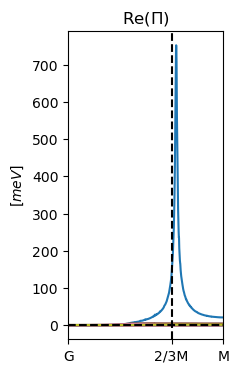

In [244]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(epw_selfen_matrix[i][i].real,label=i)
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.title(r"Re($\Pi$)")
# plt.legend()
plt.ylabel(r"[$meV$]")
# plt.savefig("./output/Re.jpg",bbox_inches='tight')

# plt.title(r"g")
# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

### $$ \Pi_{12}(\omega_{q}
)$$

# $\Pi'_{\lambda,\lambda^\prime}( q)=\sum_{n,m, k,\sigma}\frac{f(\xi_{m, k+ q,\sigma})-f(\xi_{n, k,\sigma})}{\xi_{m, k+ q,\sigma}-\xi_{n,k,\sigma}} \times\,g_{0.n,m,\lambda}( k, k+ q)\,g_{0,m,n,\lambda^\prime}( k+ q, k)$

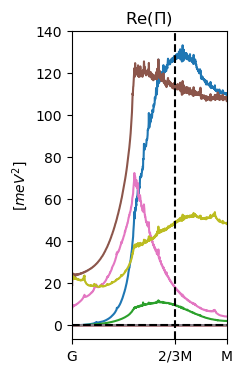

In [167]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(selfen_matrix[i][i].real,label=i)
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.title(r"Re($\Pi$)")
# plt.legend()
plt.ylabel(r"[$meV^2$]")
# plt.savefig("./output/Re.jpg",bbox_inches='tight')

# plt.title(r"g")
# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

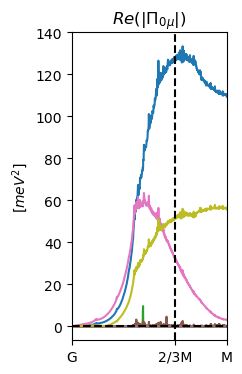

In [73]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(abs(selfen_matrix[0][i].real),label=i)
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
# plt.legend()
plt.ylabel(r"$[meV^2]$")
plt.title(r"$Re(|\Pi_{0\mu}|)$")
# plt.savefig("./output/Re0.jpg",bbox_inches='tight')

# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

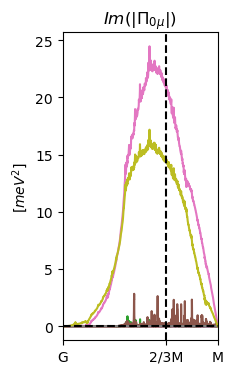

In [74]:
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(abs(selfen_matrix[0][i].imag),label=i)
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
# plt.legend()
plt.ylabel(r"$[meV^2]$")
plt.title(r"$Im(|\Pi_{0\mu}|)$")
# plt.savefig("./output/Im0.jpg",bbox_inches='tight')

# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

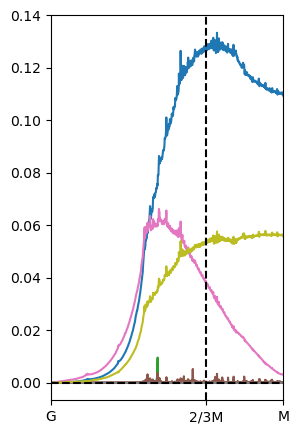

In [152]:
fig = plt.figure(figsize=(3,5))
for i in range(nph):
    plt.plot(abs(selfen_matrix[0][i]),label=i)
plt.xlim(0,nq)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
# plt.legend()
# plt.ylabel(r"Re($\Pi$) [eV]")
# plt.title(r"g")
# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

In [ ]:
#Untangled band
fig = plt.figure(figsize=(2,4))
for i in range(nph):
    plt.plot(fixed_ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
plt.axvline(nq*2/3,c='black',linestyle="--")
plt.axhline(0,c='black',linestyle="--")
plt.axvline(1394,c='black')
plt.ylabel(r"meV")
plt.title(r"$\Omega$")
# plt.savefig("./output/phonon_separated.jpg",bbox_inches='tight')
# plt.legend()
plt.show()

In [306]:
np.savetxt('./outdata/omega.dat',fixed_ph)

In [302]:
np.savetxt("./outdata/1omega.dat",1/fixed_ph[i])

In [303]:
np.savetxt("./outdata/gx.dat",gaussian_filter1d(suscep_val.astype("float32"),30)*gaussian_filter1d(reduced_removed_fixed_g_complex_mean[i].real,30))

In [305]:
np.savetxt("./outdata/g.dat",gaussian_filter1d(reduced_removed_fixed_g_complex_mean[i].real,30))

In [307]:
np.savetxt("./outdata/x.dat",gaussian_filter1d(suscep_val.astype("float32"),30))

In [308]:
np.savetxt("./outdata/pip.dat",gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),30))

In [309]:
np.savetxt("./outdata/pip0re.dat",gaussian_filter1d(abs(selfen_matrix[0][i].real),30))

In [310]:
np.savetxt("./outdata/pip0im.dat",gaussian_filter1d(abs(selfen_matrix[0][i].imag),30))

In [311]:
np.savetxt("./outdata/pi.dat",gaussian_filter1d(epw_selfen_matrix[i][i].real,10))

In [ ]:
gaussian_filter1d(epw_selfen_matrix[i][i].real,10)

In [ ]:
gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),30)

In [ ]:
gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),30)

In [ ]:
gaussian_filter1d(abs(selfen_matrix[0][i].real),30)

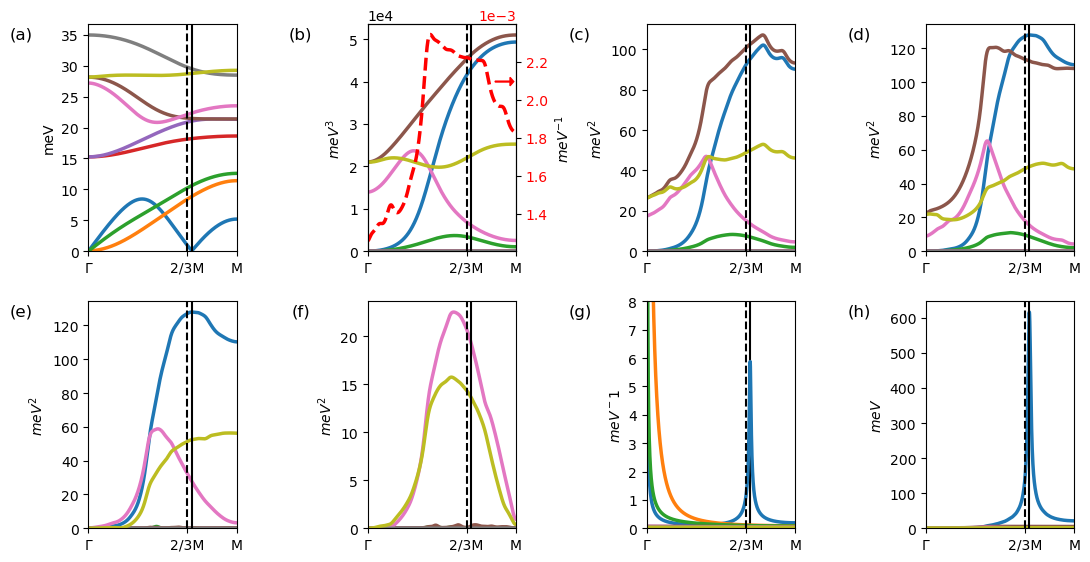

In [374]:
#Untangled band
# fig = plt.figure(figsize=(4,8))
fig, axs = plt.subplots(2, 4,figsize=(12,7))
fig.tight_layout(pad=6,h_pad=1.5)

for i in range(nph):
    axs[0][0].plot(fixed_ph[i],label=i,linewidth=2.5)
axs[0][0].set_xlim(0,nq)
axs[0][0].set_ylim(0)
axs[0][0].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
axs[0][0].set_ylabel(r"meV")
axs[0][0].axvline(nq*2/3,c='black',linestyle="--")
axs[0][0].axvline(1394,c='black')
# axs[0][0].set_title(r"$\Omega$")
axs[0][0].set_title('(a)', x=-0.45,y=0.9)



axt = axs[0][1].twinx()
axt.set_ylabel(r"$meV^{-1}$")
axt.tick_params(axis='y', labelcolor='r')
axt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

for i in range(nph):
    axs[0][1].plot(gaussian_filter1d(reduced_removed_fixed_g_complex_mean[i].real,30),linewidth=2.5)
axt.plot(gaussian_filter1d(suscep_val.astype("float32"),30),c='r',linewidth=2.5,linestyle="--")
axs[0][1].arrow(1720, 4*10**4, 200, 0, width = 0.02* 10**4,head_length=50,head_width =0.2* 10**4,color='red')
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[0][1].set_xlim(0,nq)
axs[0][1].set_ylabel(r"${meV}^{3}$")
axs[0][1].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[0][3].set_title(r"$G, \chi$")
axs[0][1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0][1].axvline(nq*2/3,c='black',linestyle="--")
axs[0][1].axvline(1394,c='black')
axs[0][1].set_ylim(0)
axs[0][1].set_title('(b)', x=-0.45,y=0.9)




for i in range(nph):
    axs[0][2].plot(gaussian_filter1d(suscep_val.astype("float32"),30)*gaussian_filter1d(reduced_removed_fixed_g_complex_mean[i].real,30),linewidth=2.5)
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[0][2].set_xlim(0,nq)
axs[0][2].set_ylabel(r"${meV}^{2}$")
axs[0][2].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[0][2].set_title(r"$G\cdot \chi$")
axs[0][2].axvline(nq*2/3,c='black',linestyle="--")
axs[0][2].set_ylim(0)
axs[0][2].axvline(1394,c='black')
axs[0][2].set_title('(c)', x=-0.45,y=0.9)




for i in range(nph):
    axs[0][3].plot(gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),30),linewidth=2.5)
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[0][3].set_xlim(0,nq)
axs[0][3].set_ylabel(r"${meV}^{2}$")
axs[0][3].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[1][0].set_title(r"$\Pi^{\prime}_{\lambda\lambda^{\prime}}$")
axs[0][3].axvline(nq*2/3,c='black',linestyle="--")
axs[0][3].axvline(1394,c='black')
axs[0][3].set_ylim(0)
axs[0][3].set_title('(d)', x=-0.45,y=0.9)


for i in range(nph):
    axs[1][0].plot(gaussian_filter1d(abs(selfen_matrix[0][i].real),30),linewidth=2.5)
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[1][0].set_xlim(0,nq)
axs[1][0].set_ylabel(r"${meV}^{2}$")
axs[1][0].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[1][1].set_title(r"$Re(\Pi^{\prime}_{0\lambda^{\prime}})$")
axs[1][0].axvline(nq*2/3,c='black',linestyle="--")
axs[1][0].axvline(1394,c='black')
axs[1][0].set_ylim(0)
axs[1][0].set_title('(e)', x=-0.45,y=0.9)

for i in range(nph):
    axs[1][1].plot(gaussian_filter1d(abs(selfen_matrix[0][i].imag),30),linewidth=2.5)
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[1][1].set_xlim(0,nq)
axs[1][1].set_ylabel(r"${meV}^{2}$")
axs[1][1].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[1][2].set_title(r"$Im(\Pi^{\prime}_{0\lambda^{\prime}})$")
axs[1][1].axvline(nq*2/3,c='black',linestyle="--")
axs[1][1].axvline(1394,c='black')
axs[1][1].set_ylim(0)
axs[1][1].set_title('(f)', x=-0.45,y=0.9)


axs[1][2].axvline(1394,c='black')
for i in range(nph):
    axs[1][2].plot(1/fixed_ph[i],label=i,linewidth=2.5)
axs[1][2].set_xlim(0,nq)
axs[1][2].set_ylim(0,8)
axs[1][2].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
axs[1][2].set_ylabel(r"${meV}^-1$")
# axs[0][1].set_title(r"${\Omega}^{-1}$")
axs[1][2].axvline(nq*2/3,c='black',linestyle="--")
axs[1][2].set_ylim(0)
axs[1][2].set_title('(g)', x=-0.45,y=0.9)



for i in range(nph):
    axs[1][3].plot(gaussian_filter1d(epw_selfen_matrix[i][i].real,10),linewidth=2.5)
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[1][3].set_xlim(0,nq)
axs[1][3].set_ylabel(r"${meV}$")
axs[1][3].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[1][3].set_title(r"$\Pi_{\lambda\lambda^{\prime}}$")
axs[1][3].axvline(nq*2/3,c='black',linestyle="--")
axs[1][3].axvline(1394,c='black')
axs[1][3].set_ylim(0)
axs[1][3].set_title('(h)', x=-0.45,y=0.9)



    # plt.plot(abs(selfen_matrix[0][i].real),label=i)
# plt.title(r"$1/\Omega$")
plt.savefig("./output/figure.jpg",bbox_inches='tight')
plt.show()

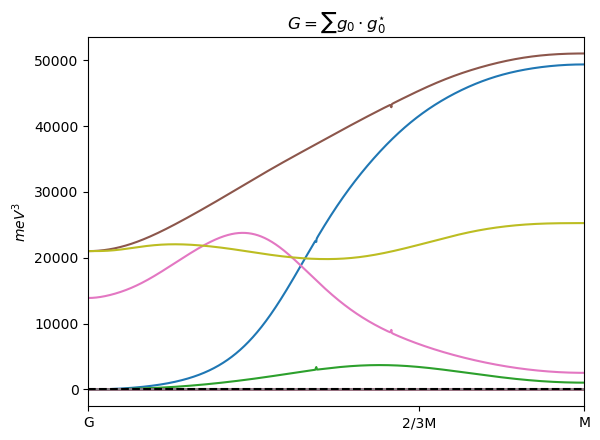

In [ ]:
path_create